In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications import imagenet_utils
from keras.models import Sequential, Model
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
namefile = 'Dropout 0'

Using TensorFlow backend.


In [ ]:
def prepare_images(file):
    img_path = "Data/training/LetraA/"
    img = image.load_img(img_path + file, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis= 0)
    
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

Preparación de las imágenes 

In [3]:
#Create images generator
VAL_DIR="Data/validation"
#"/home/luis/Downloads/fingerspelling5/dataset5/A/"
TRAIN_DIR = "Data/training"
#"/home/luis/Downloads/fingerspelling5/dataset5/B/"
#
BATCH_SIZE =2

In [4]:
train_batch = ImageDataGenerator(preprocessing_function = keras.applications.mobilenet.preprocess_input,rotation_range=15,rescale=1./255).flow_from_directory(TRAIN_DIR, target_size=(224,224) , batch_size = BATCH_SIZE)
val_batch = ImageDataGenerator(preprocessing_function = keras.applications.mobilenet.preprocess_input).flow_from_directory(VAL_DIR, target_size=(224,224), batch_size = BATCH_SIZE)

Found 1277 images belonging to 21 classes.
Found 189 images belonging to 21 classes.


In [5]:
mobile = keras.applications.mobilenet.MobileNet()

W0904 18:58:42.772998 140256330340160 deprecation_wrapper.py:119] From /home/luis/.conda/envs/TF/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0904 18:58:42.784037 140256330340160 deprecation_wrapper.py:119] From /home/luis/.conda/envs/TF/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0904 18:58:42.787069 140256330340160 deprecation_wrapper.py:119] From /home/luis/.conda/envs/TF/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0904 18:58:42.802974 140256330340160 deprecation_wrapper.py:119] From /home/luis/.conda/envs/TF/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.ge

In [6]:
x = mobile.layers[-6].output
predictions = Dense(21, activation = 'softmax')(x)
model = Model(inputs = mobile.inputs, outputs=predictions)

In [7]:
#model.summary()

In [8]:
for layer in model.layers[:-5]:
    layer.trainable = False

In [9]:
def plot_training(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label = 'train acc')
    plt.plot(epochs, val_acc, 'r', label = 'val acc')
    plt.legend(loc='lower right')
    plt.title('Training and validation accuracy')

    plt.figure()
    plt.plot(epochs, loss, 'b', label= 'train loss')
    plt.plot(epochs, val_loss, 'r-', label ='val loss')
    plt.legend(loc='lower right')
    plt.title('Training and validation loss')
    plt.show()

In [10]:
filepath = 'Mobile'+ namefile+'.h5'
adam =Adam(lr=0.0001, beta_1=0.9, epsilon=1e-08)
model.compile(adam,loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint(filepath, monitor=["val_acc"],  verbose=1,
                             mode='max')
callbacks_list = [checkpoint]

W0904 18:58:49.311595 140256330340160 deprecation_wrapper.py:119] From /home/luis/.conda/envs/TF/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



W0904 18:58:49.754795 140256330340160 deprecation.py:323] From /home/luis/.conda/envs/TF/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/30
639/639 [==============================] - 23s 36ms/step - loss: 2.4026 - acc: 0.2833 - val_loss: 2.0539 - val_acc: 0.3333

Epoch 00001: saving model to MobileDropout 0.h5
Epoch 2/30
639/639 [==============================] - 21s 33ms/step - loss: 1.5821 - acc: 0.5532 - val_loss: 1.5776 - val_acc: 0.5661

Epoch 00002: saving model to MobileDropout 0.h5
Epoch 3/30
639/639 [==============================] - 22s 35ms/step - loss: 1.2402 - acc: 0.6729 - val_loss: 1.4277 - val_acc: 0.5556

Epoch 00003: saving model to MobileDropout 0.h5
Epoch 4/30
639/639 [==============================] - 22s 34ms/step - loss: 0.9876 - acc: 0.7308 - val_loss: 1.4093 - val_acc: 0.5397

Epoch 00004: saving model to MobileDropout 0.h5
Epoch 5/30
639/639 [==============================] - 22s 34ms/step - loss: 0.8443 - acc: 0.7856 - val_loss: 1.2086 - val_acc: 0.6296

Epoch 00005: saving model to MobileDropout 0.h5
Epoch 6/30
639/639 [==============================] - 21s 34ms/step - loss: 0.7679 - 

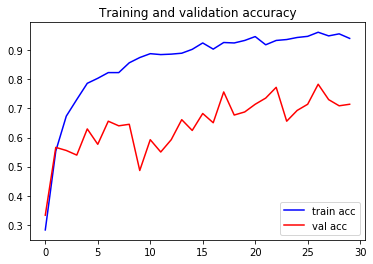

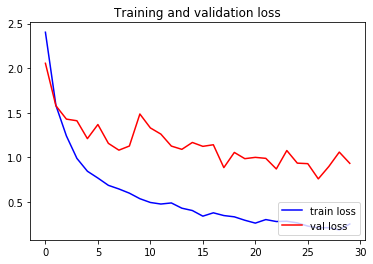

In [11]:
numero_epocas = 30

history = model.fit_generator(train_batch, steps_per_epoch=len(train_batch), callbacks=callbacks_list, validation_data= val_batch, 
                              validation_steps = val_batch.samples/val_batch.batch_size, epochs=numero_epocas, verbose = 1)


plot_training(history)